In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from bband_squeeze import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [4]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['ETH']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 14.03 %
MDD: 38.04 %
MDD Duration 433 days 08:00:00
worst trade: -15.46 %
2022-09-07 02:00:00 ~ 2022-09-09 12:00:00
avg holding days: 4.34 days
--------------------------------------------
PF: 1.08
Sharpe Ratio: 0.50
Calmar Ratio: 0.35
Sortino Ratio: 0.72
Omega Ratio: 1.02
--------------------------------------------
Expectancy : 0.22 %
Total Time Exposure : 72.53 %
Total Trades: 114
Win Rate: 40.71 %
--------------------------------------------
PF * Win Rate: 0.441


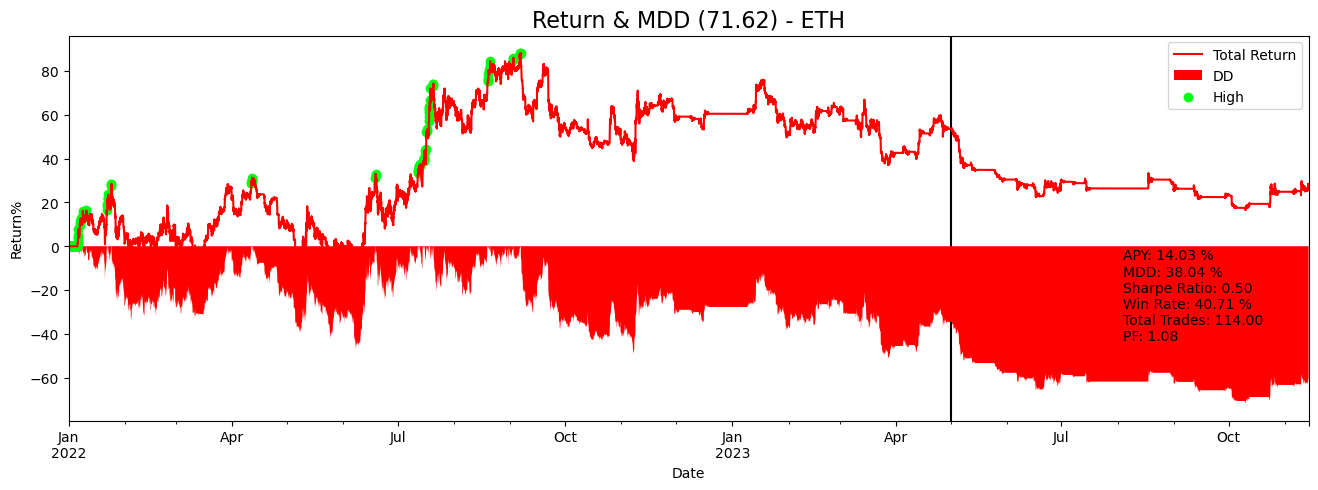

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-13 23:00:00
 Period                                682 days 00:00:00
 Start Value                                     10000.0
 Min Value                                   8442.938532
 Max Value                                  18826.254897
 End Value                                  12617.354141
 Total Return [%]                              26.173541
 Benchmark Return [%]                         -44.648505
 Total Time Exposure [%]                       72.531769
 Max Gross Exposure [%]                        112.92579
 Max Drawdown [%]                              38.044992
 Max Drawdown Duration                 433 days 08:00:00
 Total Orders                                        151
 Total Fees Paid                              677.704492
 Total Trades                                        114
 Win Rate [%]                                  40.707965
 Best Trade [%]         

In [6]:
start = '2022-01-01'
sep = ''
end = ''

params = {"window_size": 48,
        "multiplier": 2,
        "bigger_width":5,
        "smaller_width":2}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003, 'weekend_filter': False, 'rv_filter':False}
coin = 'ETH'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

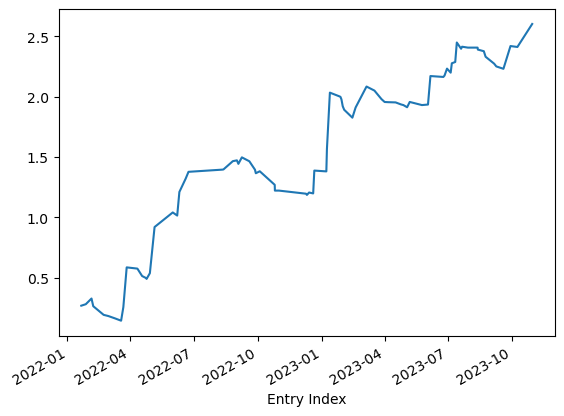

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= ETH BOTH Optimize Test =======================
Optimization trails: 400


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 20.1 sec
---------- ETH BOTH ----------
{'window_size': 56, 'multiplier': 2, 'bigger_width': 9.0, 'smaller_width': 3.0}
APY: 46.36 %
MDD: 14.25 %
MDD Duration 173 days 00:30:00
worst trade: -11.91 %
2022-07-26 01:15:00 ~ 2022-07-27 19:00:00
avg holding days: 1.35 days
--------------------------------------------
PF: 1.91
Sharpe Ratio: 1.24
Calmar Ratio: 3.05
Sortino Ratio: 1.76
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 1.23 %
Total Time Exposure : 13.91 %
Total Trades: 50
Win Rate: 54.00 %
--------------------------------------------
PF * Win Rate: 1.029


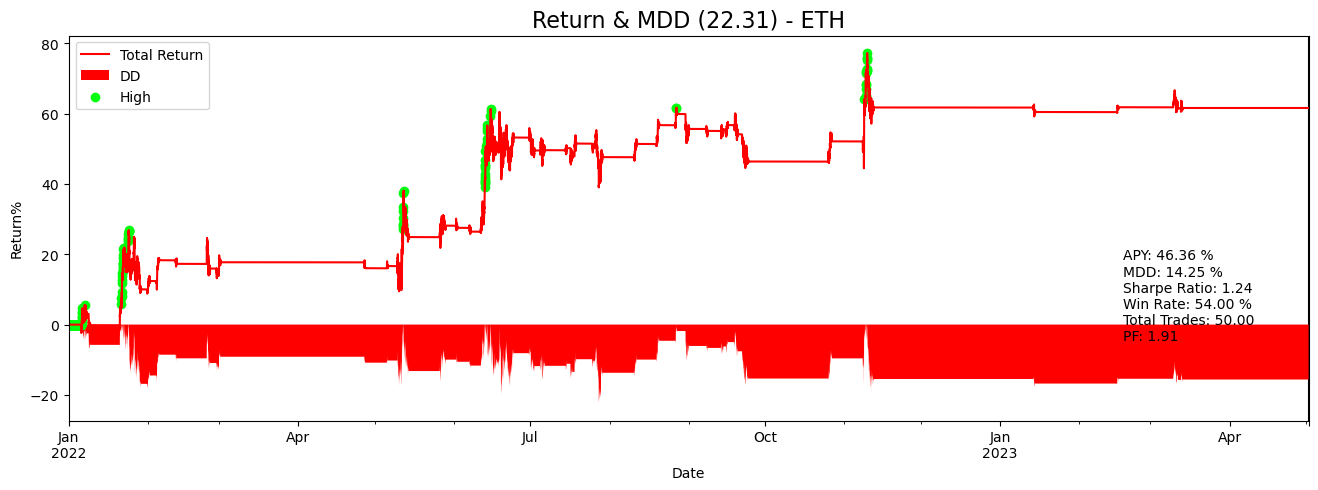

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     17.77 | 3357.18 | -1584.77 |       2.12 |   53.85 |         13 |
| 2022-06    |     35.77 | 5084.01 | -1506.87 |       3.37 |   53.85 |         13 |
| 2022-09    |     -7.12 | 2668.9  | -3380.95 |       0.79 |   52.94 |         17 |
| 2022-12    |     15.37 | 1705.12 |  -168.09 |      10.14 |   66.67 |          3 |
| 2023-03    |     -0.15 |  146.51 |  -161.01 |       0.91 |   50    |          4 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------


In [8]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['']
sample_sets = [[start,end]]
# freq = '1h'
params = {"window_size": [20,60,4],
        "multiplier": [2,3,1],
        "bigger_width":[5,10,.5],
        "smaller_width":[3,5,.5]}

config = {'freq':'15T','fee': 0.0003}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(['ETH'],sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
print(f'-------------------1h is done----------------------')
